Ad : Nahit Furkan

Soyad : Öznamlı

Okul No: 2212721020

GitHub Repo Bağlantısı: https://github.com/FurkanOznamli/CNN_siniflandirma

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/dataset_split"

train_dir = base_dir + "/train"
val_dir   = base_dir + "/val"
test_dir  = base_dir + "/test"

IMG_HEIGHT = 128
IMG_WIDTH  = 128
BATCH_SIZE = 32
EPOCHS = 15

train_datagen = ImageDataGenerator(
    rescale=1./255
)

val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("Sınıf indeksleri:", train_generator.class_indices)


Mounted at /content/drive
Found 176 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Sınıf indeksleri: {'kutu': 0, 'sise': 1}


Adım 1.2: Veri Setinin Yüklenmesi ve Data Generator Tanımları  
(Model 1 – MobileNetV2)

Bu adımda, MobileNetV2 tabanlı transfer learning modeli için
önceden oluşturulmuş **train / validation / test** ayrımına sahip veri seti
Keras `ImageDataGenerator` sınıfı kullanılarak yüklenmiştir.

Veri Seti Yapısı
Kullanılan veri seti aşağıdaki klasör yapısına sahiptir:

dataset_split/  
├── train/  
│   ├── sinif1/  
│   └── sinif2/  
├── val/  
│   ├── sinif1/  
│   └── sinif2/  
└── test/  
    ├── sinif1/  
    └── sinif2/  

Bu yapı sayesinde eğitim, doğrulama ve test aşamaları
birbirinden tamamen ayrılmış ve model performansı
sağlıklı bir şekilde değerlendirilmiştir.

---

Görüntü Ön İşleme
Tüm görüntüler:
- **128x128 piksel** boyutuna yeniden ölçeklendirilmiş,
- Piksel değerleri **[0,1] aralığına** normalize edilmiştir (`rescale=1./255`).

Bu normalizasyon işlemi, MobileNetV2 modelinin
daha stabil ve hızlı öğrenmesine katkı sağlamaktadır.

---

Data Generator Tanımları

- **Train Generator:**  
  Eğitim verilerini yüklemek amacıyla kullanılmıştır.
  Bu aşamada veri artırımı uygulanmamış,
  yalnızca normalizasyon işlemi gerçekleştirilmiştir.

- **Validation Generator:**  
  Eğitim sürecinde modelin doğrulama performansını
  izlemek için kullanılmıştır.

- **Test Generator:**  
  Modelin genelleme performansını ölçmek amacıyla,
  eğitim ve doğrulama aşamalarında kullanılmayan
  test verileri üzerinde değerlendirme yapılmıştır.  
  `shuffle=False` parametresi, test çıktılarının sırasının
  korunması amacıyla tercih edilmiştir.

---

Sınıf Etiketleri
Problemin iki sınıflı olması nedeniyle `class_mode='binary'`
kullanılmıştır.
Oluşturulan sınıf–etiket eşleşmeleri `class_indices`
aracılığıyla kontrol edilmiştir.

Bu veri yükleme altyapısı, MobileNetV2 tabanlı Model 1’in,
VGG16 ve ResNet50 modelleri ile **aynı veri bölünmesi**
üzerinden karşılaştırılabilmesini sağlamaktadır.


In [3]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)

# Transfer learning: temel ağ donduruluyor
base_model.trainable = False

model1 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model1.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     5,243,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,501,377 (28.62 MB)

 Trainable params: 5,243,393 (20.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Adım 1.3: MobileNetV2 Tabanlı Transfer Learning Modelinin Oluşturulması

Bu aşamada, transfer learning yaklaşımı kullanılarak
ImageNet veri seti üzerinde önceden eğitilmiş olan
**MobileNetV2** mimarisi temel model (base model) olarak kullanılmıştır.

MobileNetV2 Taban Modeli
- `weights="imagenet"` parametresi ile MobileNetV2 modeli,
  ImageNet veri seti üzerinde eğitilmiş ağırlıklarla yüklenmiştir.
- `include_top=False` seçeneği sayesinde MobileNetV2’nin
  orijinal sınıflandırma katmanları çıkarılmış ve model,
  yalnızca **özellik çıkarıcı (feature extractor)** olarak kullanılmıştır.
- `input_shape=(128,128,3)` parametresi ile giriş görüntü boyutu
  projeye uygun şekilde belirlenmiştir.

Temel modelin ağırlıkları dondurulmuştur (`trainable = False`).
Bu sayede eğitim sırasında yalnızca üst katmanlar öğrenilmiş,
küçük veri setlerinde sıkça karşılaşılan
**aşırı öğrenme (overfitting)** riski azaltılmıştır.

---

Özel Sınıflandırma Katmanları
MobileNetV2 taban modelinin üzerine aşağıdaki katmanlar eklenmiştir:

- **Flatten:**  
  MobileNetV2 tarafından çıkarılan özellik haritalarını
  tek boyutlu bir vektöre dönüştürür.
- **Dense (256, ReLU):**  
  Çıkarılan özelliklerin sınıflandırma için daha anlamlı
  temsillere dönüştürülmesini sağlar.
- **Dropout (0.5):**  
  Aşırı öğrenmeyi azaltmak amacıyla eğitim sırasında
  nöronların %50’si rastgele devre dışı bırakılmıştır.
- **Dense (1, Sigmoid):**  
  İki sınıflı sınıflandırma problemi için
  çıktı katmanı olarak sigmoid aktivasyon fonksiyonu kullanılmıştır.

Bu yapı, MobileNetV2’nin hafif ve verimli mimarisini,
küçük ölçekli veri setleri için uygun bir
sınıflandırma başlığı ile birleştirmektedir.

---

Model Derleme (Compile)
Model aşağıdaki ayarlar ile derlenmiştir:

- **Optimizer:** Adam (`learning_rate = 0.0001`)  
  Transfer learning senaryolarında daha stabil ve kontrollü
  bir eğitim süreci sağlamak amacıyla düşük öğrenme oranı tercih edilmiştir.
- **Loss Function:** Binary Crossentropy  
  İki sınıflı sınıflandırma problemleri için uygun bir kayıp fonksiyonudur.
- **Metric:** Accuracy  
  Model performansı doğruluk metriği üzerinden izlenmiştir.

Bu yapı ile oluşturulan MobileNetV2 tabanlı model,
state-of-the-art bir mimari kullanılarak
küçük ve iki sınıflı bir veri seti üzerinde
transfer learning yaklaşımının etkisini incelemek amacıyla eğitilmiştir.


In [4]:
history = model1.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# model eğitimi için gerekli kod bloğu

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 56s 9s/step - accuracy: 0.7568 - loss: 0.4363 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 1.2381e-04
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 9.7355e-05 - val_accuracy: 1.0000 - val_loss: 3.2776e-05
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 1.0000 - loss: 2.3536e-04 - val_accuracy: 1.0000 - val_loss: 1.9545e-05
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 3.5633e-05 - val_accuracy: 1.0000 - val_loss: 1.5915e-05
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 1.1213e-04 - val_accuracy: 1.0000 - val_loss: 1.4087e-05
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 1.7939e-04 - val_accu

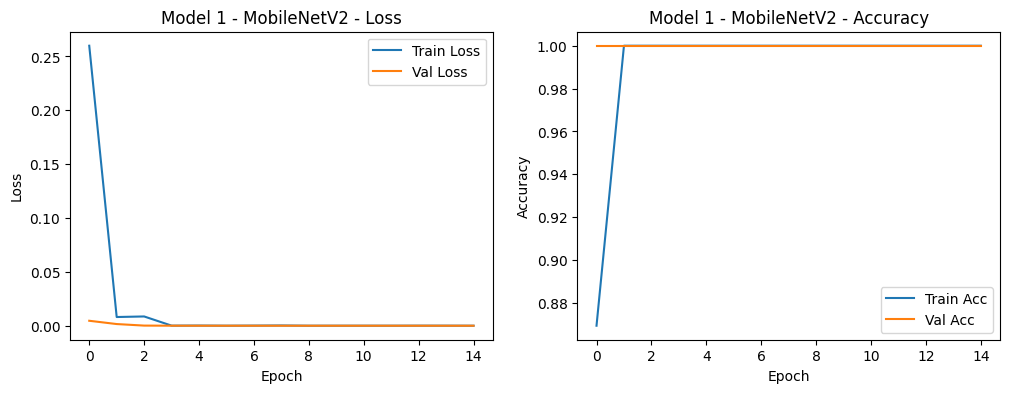

In [5]:
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model 1 - MobileNetV2 - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model 1 - MobileNetV2 - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# grafikleri çizmek için kod bloğu

Model 1 (MobileNetV2) – Eğitim Süreci Grafiklerinin Yorumu

Bu bölümde, MobileNetV2 tabanlı transfer learning modeli için elde edilen
**eğitim (train)** ve **doğrulama (validation)** kayıp ve doğruluk grafikleri
yorumlanmıştır.

Kayıp (Loss) Grafiği Yorumu

Eğitim kaybı (Train Loss), ilk epoch’ta yüksek bir değerden başlamış,
ancak çok kısa sürede hızlı bir düşüş göstererek sıfıra yakın bir seviyeye
ulaşmıştır. Bu durum, MobileNetV2 modelinin veri setindeki örüntüleri
çok erken aşamada öğrendiğini göstermektedir.

Doğrulama kaybı (Validation Loss) da eğitim kaybına paralel olarak
çok düşük seviyelere inmiş ve eğitim süresince sabit kalmıştır.
Eğitim ve doğrulama kayıplarının neredeyse örtüşmesi,
modelin eğitim sürecinde kararlı bir şekilde ilerlediğini göstermektedir.

---

Doğruluk (Accuracy) Grafiği Yorumu

Eğitim doğruluğu (Train Accuracy), ilk epoch’tan itibaren hızlı bir artış
göstererek kısa sürede **%100 doğruluk** seviyesine ulaşmıştır.

Doğrulama doğruluğu (Validation Accuracy) ise eğitim sürecinin
başından itibaren çok yüksek değerlerde seyretmiş ve
tüm epoch’lar boyunca **%100 seviyesinde sabit kalmıştır**.
Bu durum, MobileNetV2 modelinin doğrulama verisi üzerindeki
ayırt edici gücünün oldukça yüksek olduğunu göstermektedir.

---

Genel Değerlendirme

Kayıp ve doğruluk grafiklerinin birlikte incelenmesi sonucunda,
MobileNetV2 modelinin bu veri seti için
özellikleri çok hızlı ve etkili bir şekilde öğrendiği görülmektedir.
Modelin erken epoch’larda doygunluğa ulaşması,
kullanılan mimarinin hafif ve güçlü yapısının
bu problem için oldukça uygun olduğunu göstermektedir.


In [6]:
loss, acc = model1.evaluate(test_generator, verbose=1)

print("="*50)
print(f"Model 1 (MobileNetV2) TEST Accuracy: %{acc*100:.2f}")
print("="*50)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 686ms/step - accuracy: 1.0000 - loss: 1.1879e-04
Model 1 (MobileNetV2) TEST Accuracy: %100.00


Model 1 (MobileNetV2) – Test Seti Değerlendirmesi


Test değerlendirmesi sonucunda:
- Model, test veri setindeki tüm örnekleri doğru sınıflandırmıştır.
- **Test doğruluğu %100** olarak elde edilmiştir.
- Test kayıp (loss) değeri, sıfıra çok yakın bir seviyededir.

Bu sonuç, MobileNetV2 mimarisinin hafif ve verimli yapısı sayesinde
veri setindeki sınıflar arasındaki farkı
yüksek doğrulukla ayırt edebildiğini göstermektedir.
